<a href="https://colab.research.google.com/github/prakashsukhwal/Misc./blob/main/FA_sol_R_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('pacman')

In [ ]:
pacman::p_load(tidyverse, lubridate, gridExtra, psych, nFactors, DT, RJSplot)# might take a while in colab

In [3]:
options(repr.plot.width=18, repr.plot.height=6)# control the fig sizes

## Problem Statement

---


Income is one the best indicator of socio-economic classification [1] that market researchers use when describing different segments of the population. In Philippines, household’s income is surveyed by Philippines Statistics Authority along with the family characteristics, consumption and expenditures. These data are used for government’s policies and programs but are also used by corporate brand marketers and researchers.
 
The data “Family Income and Expenditure_v2.xls” (downloaded from the below link) contains selected variable from Family Income and Expenditure Survey (FIES) collected by Philippine Statistics Authority (PSA) nationwide on 2015. Selected Data contains 34008 observations and 47 columns(variables) which are mostly income and expenditures of each surveyed household (data has been provided after some data cleaning and removing some of the variables) .
Please do further data cleaning if necessary. 
https://www.kaggle.com/grosvenpaul/family-income-and-expenditure


## Purpose

---


The purpose of this exercise is:
Identification of the latent factors that influence Philippines household income
Identification of household segments using the derived factors
Predict the Total Household Income in the Philippines based on the set of latent factors

This project is a practical demonstration of necessity of dimension reduction while the main objective of the data analytics is Income estimation (regression) and understand the characteristics of different segments (segmentation/clustering) of the population for the policy making purposes. 

Step 1: Understand the data quality and clean up the data. 
Preparation for regression: Check the distribution of income if it is normally distributed, otherwise it violates the basic assumption of regression theory.  
Understand whether there is collinearity among the scale (continuous) variables barring Income (Y) both for regression and clustering. 


## Comments

---


The limitation in performing linear regression to predict Philippines household income is that most of the measured variables are highly correlated thus a multiple linear regression analysis is not possible without selecting only few variables to avoid multicollinearity. The choice is to use PCA/Factor Analysis to form new variables which are uncorrelated linear combinations of original variables and accounts to substantial amount of total variance. However, typically there are underlying household characteristics or other latent household constructs that affect the Household Income. Thus, Factor Analysis will be more suitable for dimension reduction method. Derived latent factors can also be used to analyse and describe different segments of the Philippines Population.


## Data import & cleaning

### Read in the data

In [4]:
# Read in the dataset
data = read.csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ1ve2v0Bs5bpDtzHDvPQ-kda9xBDLdRE1cbRuAoTnIYOonFw4gCP5V-fGcDyVJDzl2a_N-tLbKs-O9/pub?gid=262777885&single=true&output=csv', stringsAsFactors = T)
# prcb$date2 = ymd(prcb$date)                
# prcb$date = as.numeric(ymd(prcb$date))
head(data, 4)

,Total.Household.Income,Region,Total.Food.Expenditure,Main.Source.of.Income,Agricultural.Household.indicator,Bread.and.Cereals.Expenditure,Total.Rice.Expenditure,Meat.Expenditure,Total.Fish.and..marine.products.Expenditure,Fruit.Expenditure,⋯,Type.of.Building.House,Type.of.Roof,Type.of.Walls,House.Floor.Area,House.Age,Number.of.bedrooms,Tenure.Status,Toilet.Facilities,Electricity,Main.Source.of.Water.Supply
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>
1,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,⋯,Single house,"Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusively by household",1,"Own use, faucet, community water system"
2,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,⋯,Single house,"Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusively by household",1,"Own use, faucet, community water system"
3,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,⋯,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with other household",0,"Shared, faucet, community water system"
4,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,⋯,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system"


### Examine structure of the data

In [5]:
str(data) #34008 rows,  47 variables

'data.frame':	34008 obs. of  47 variables:
 $ Total.Household.Income                       : int  480332 198235 82785 107589 189322 152883 198621 134961 625753 147005 ...
 $ Region                                       : Factor w/ 17 levels " ARMM","CAR",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Total.Food.Expenditure                       : int  117848 67766 61609 78189 94625 73326 104644 95644 158721 79530 ...
 $ Main.Source.of.Income                        : Factor w/ 3 levels "Enterpreneurial Activities",..: 3 3 3 3 3 3 3 2 1 1 ...
 $ Agricultural.Household.indicator             : int  0 0 1 0 0 0 0 1 0 1 ...
 $ Bread.and.Cereals.Expenditure                : int  42140 17329 34182 34030 34820 29065 40992 37168 56003 36588 ...
 $ Total.Rice.Expenditure                       : int  38300 13008 32001 28659 30167 25190 36312 28156 43239 30167 ...
 $ Meat.Expenditure                             : int  24676 17434 7783 10914 18391 15336 12968 14640 26488 11174 ...
 $ Total.Fish.and..marine.products

In [6]:
summary(data)

 Total.Household.Income                   Region      Total.Food.Expenditure
 Min.   :   11285       IVA - CALABARZON     : 3238   Min.   :  3704        
 1st Qu.:  104392       NCR                  : 3109   1st Qu.: 51702        
 Median :  158914       III - Central Luzon  : 2433   Median : 72598        
 Mean   :  239114       VI - Western Visayas : 2303   Mean   : 84346        
 3rd Qu.:  274562        ARMM                : 2094   3rd Qu.:103865        
 Max.   :11815988       VII - Central Visayas: 2092   Max.   :791848        
                        (Other)              :18739                         
                Main.Source.of.Income Agricultural.Household.indicator
 Enterpreneurial Activities: 9660     Min.   :0.0000                  
 Other sources of Income   : 6599     1st Qu.:0.0000                  
 Wage/Salaries             :17749     Median :0.0000                  
                                      Mean   :0.4471                  
                             

### Examine our target: Total.Household.Income

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



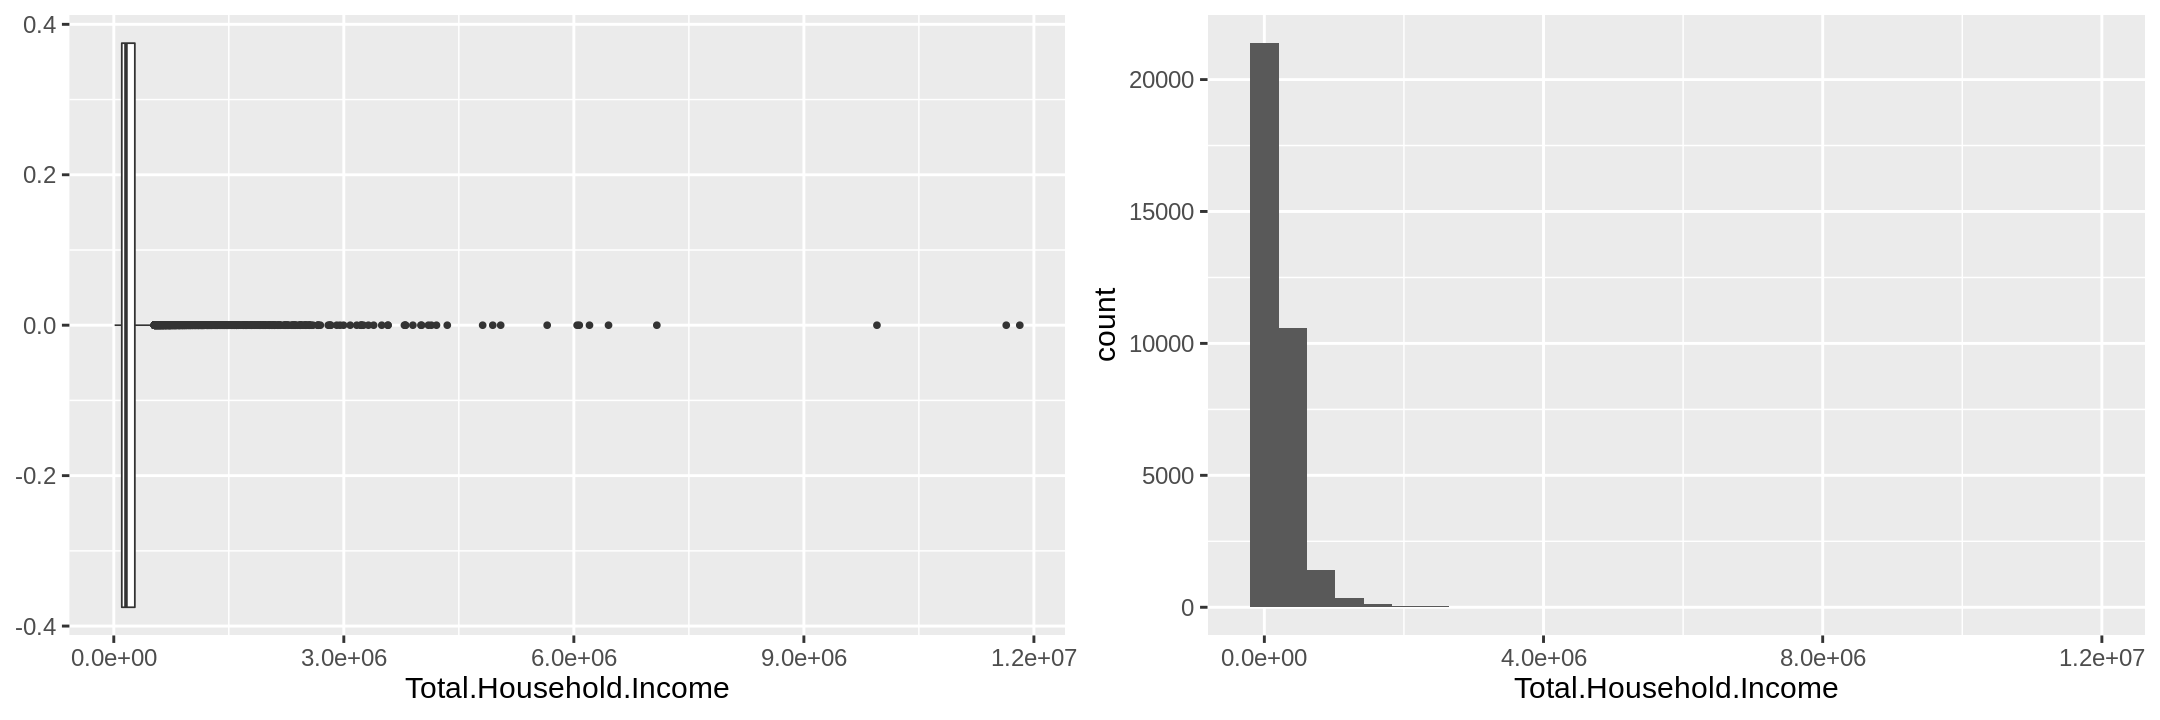

In [7]:
p1 = data %>%
ggplot(aes(x = Total.Household.Income)) + geom_boxplot() + theme_gray(base_size = 18)

p2 = data %>%
ggplot(aes(x = Total.Household.Income)) + geom_histogram()+ theme_gray(base_size = 18)

grid.arrange(p1, p2, nrow = 1)

In [8]:
summary(data$Total.Household.Income)

pvec <- seq(0,1,0.1)
data.frame(quantile(data$Total.Household.Income, pvec))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   11285   104392   158914   239114   274562 11815988 

,quantile.data.Total.Household.Income..pvec.
,<dbl>
0%,11285.0
10%,72625.7
20%,94849.2
30%,113970.3
40%,134309.4
50%,158914.0
60%,191258.0
70%,240160.9
80%,319450.4


 

*   There were many outliers on the high side. Eliminated all observations with Income >= 750000(rounded down from 886216.3): 1254 observations eliminated 



In [9]:
dt = data[!data$Total.Household.Income > 750000,]
print("rows eleminated")
nrow(data) - nrow(dt)

[1] "rows eleminated"


[1] 1254

In [10]:
print("current dimension of data")
dim(dt)

[1] "current dimension of data"


[1] 32754    47

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



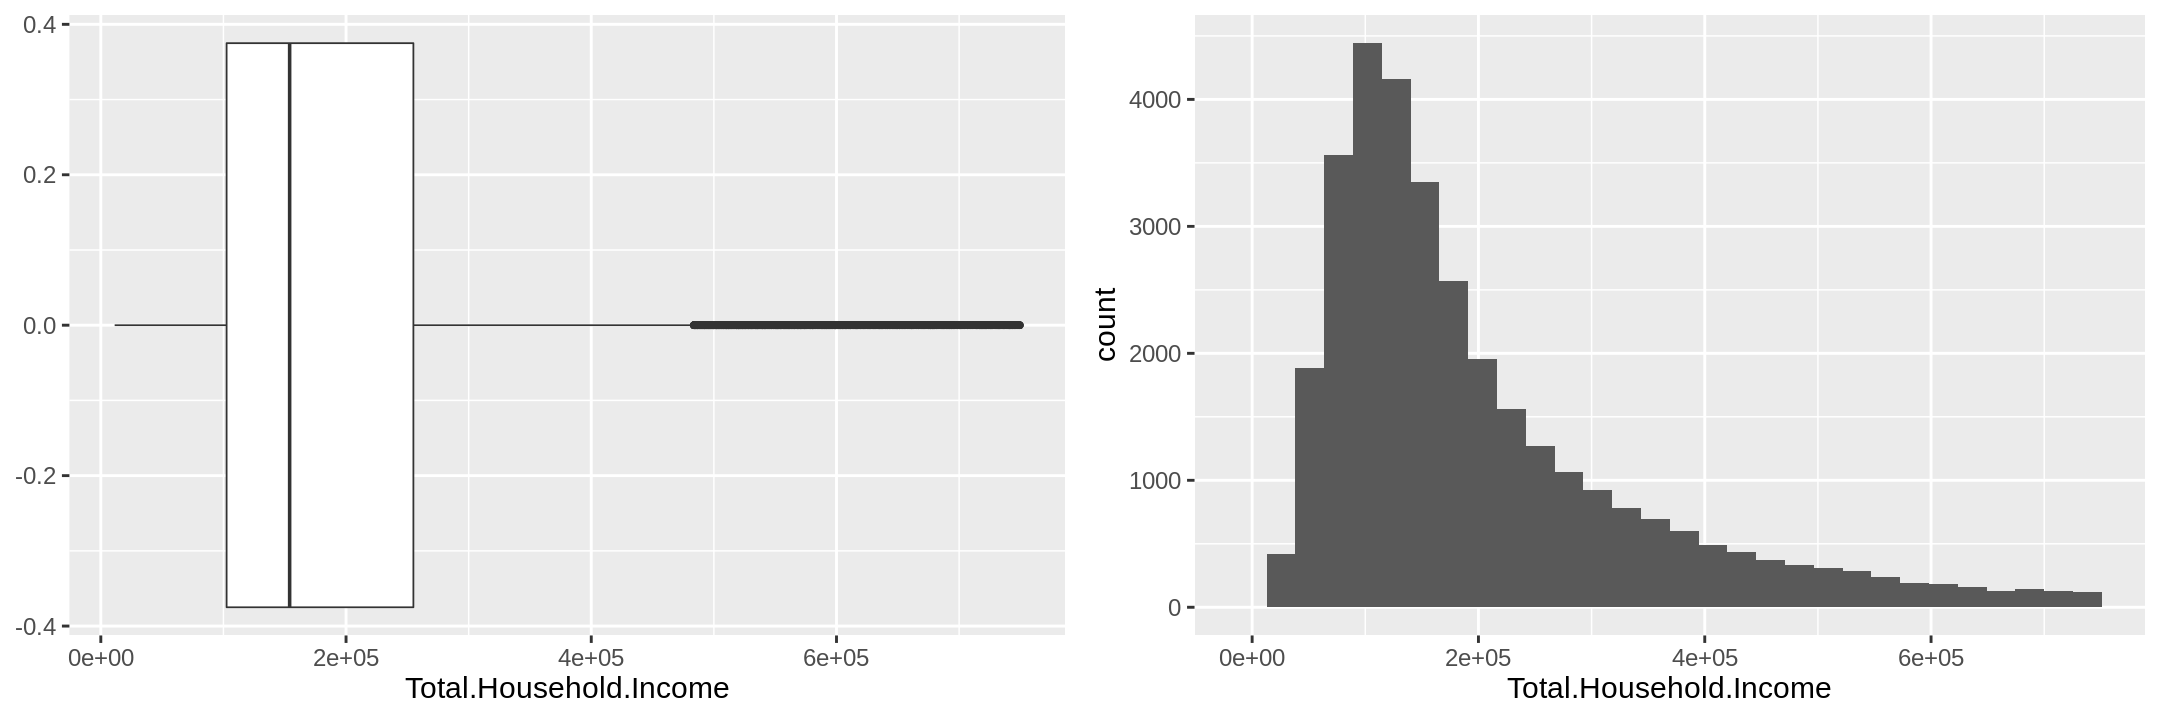

In [11]:
p1 = dt %>%
ggplot(aes(x = Total.Household.Income)) + geom_boxplot() + theme_gray(base_size = 18)

p2 = dt %>%
ggplot(aes(x = Total.Household.Income)) + geom_histogram()+ theme_gray(base_size = 18)

grid.arrange(p1, p2, nrow = 1)




*   Since this is skewed we take Ynew = ln(Total Household Income). The distribution changes to as below



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



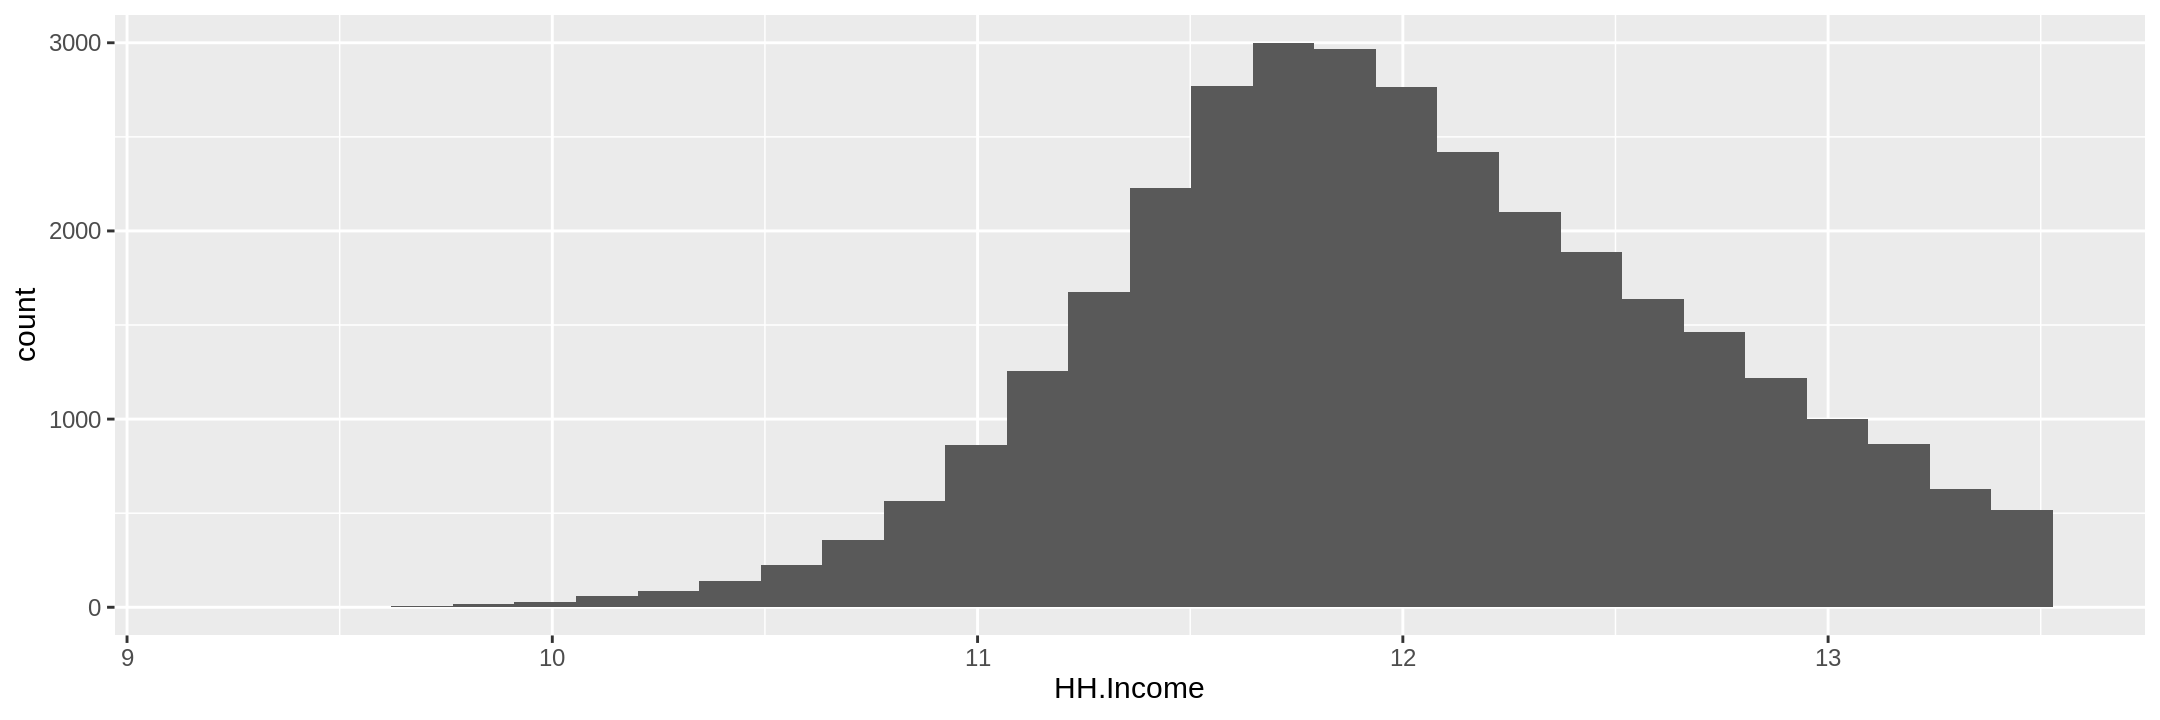

In [12]:
dt$HH.Income = log(dt$Total.Household.Income)
dt %>%
ggplot(aes(x = HH.Income)) + geom_histogram()+ theme_gray(base_size = 18)



*   Looking at similar tables for other numeric variables odd ones were identified and similar clean up was performed.
*   Basically, eliminate various unusual patterns (outliers). These decisions are typically made looking at the context of the business problem we are trying to solve and it changes from domain to domain as well.  







In [13]:
names(dt)

[1] "Total.Household.Income"                       
 [2] "Region"                                       
 [3] "Total.Food.Expenditure"                       
 [4] "Main.Source.of.Income"                        
 [5] "Agricultural.Household.indicator"             
 [6] "Bread.and.Cereals.Expenditure"                
 [7] "Total.Rice.Expenditure"                       
 [8] "Meat.Expenditure"                             
 [9] "Total.Fish.and..marine.products.Expenditure"  
[10] "Fruit.Expenditure"                            
[11] "Vegetables.Expenditure"                       
[12] "Restaurant.and.hotels.Expenditure"            
[13] "Alcoholic.Beverages.Expenditure"              
[14] "Tobacco.Expenditure"                          
[15] "Clothing..Footwear.and.Other.Wear.Expenditure"
[16] "Housing.and.water.Expenditure"                
[17] "Imputed.House.Rental.Value"                   
[18] "Medical.Care.Expenditure"                     
[19] "Transportation.Expenditure"                   
[20] "Communication.Expenditure"                    
[21] "Education.Expenditure"                        
[22] "Miscellaneous.Goods.and.Services.Expenditure" 
[23] "Special.Occasions.Expenditure"                
[24] "Crop.Farming.and.Gardening.expenses"          
[25] "Total.Income.from.Entrepreneurial.Acitivites" 
[26] "Household.Head.Sex"                           
[27] "Household.Head.Age"                           
[28] "Household.Head.Marital.Status"                
[29] "Household.Head.Highest.Grade.Completed"       
[30] "Household.Head.Job.or.Business.Indicator"     
[31] "Household.Head.Occupation"                    
[32] "Household.Head.Class.of.Worker"               
[33] "Type.of.Household"                            
[34] "Total.Number.of.Family.members"               
[35] "Members.with.age.less.than.5.year.old"        
[36] "Members.with.age.5...17.years.old"            
[37] "Total.number.of.family.members.employed"      
[38] "Type.of.Building.House"                       
[39] "Type.of.Roof"                                 
[40] "Type.of.Walls"                                
[41] "House.Floor.Area"                             
[42] "House.Age"                                    
[43] "Number.of.bedrooms"                           
[44] "Tenure.Status"                                
[45] "Toilet.Facilities"                            
[46] "Electricity"                                  
[47] "Main.Source.of.Water.Supply"                  
[48] "HH.Income"

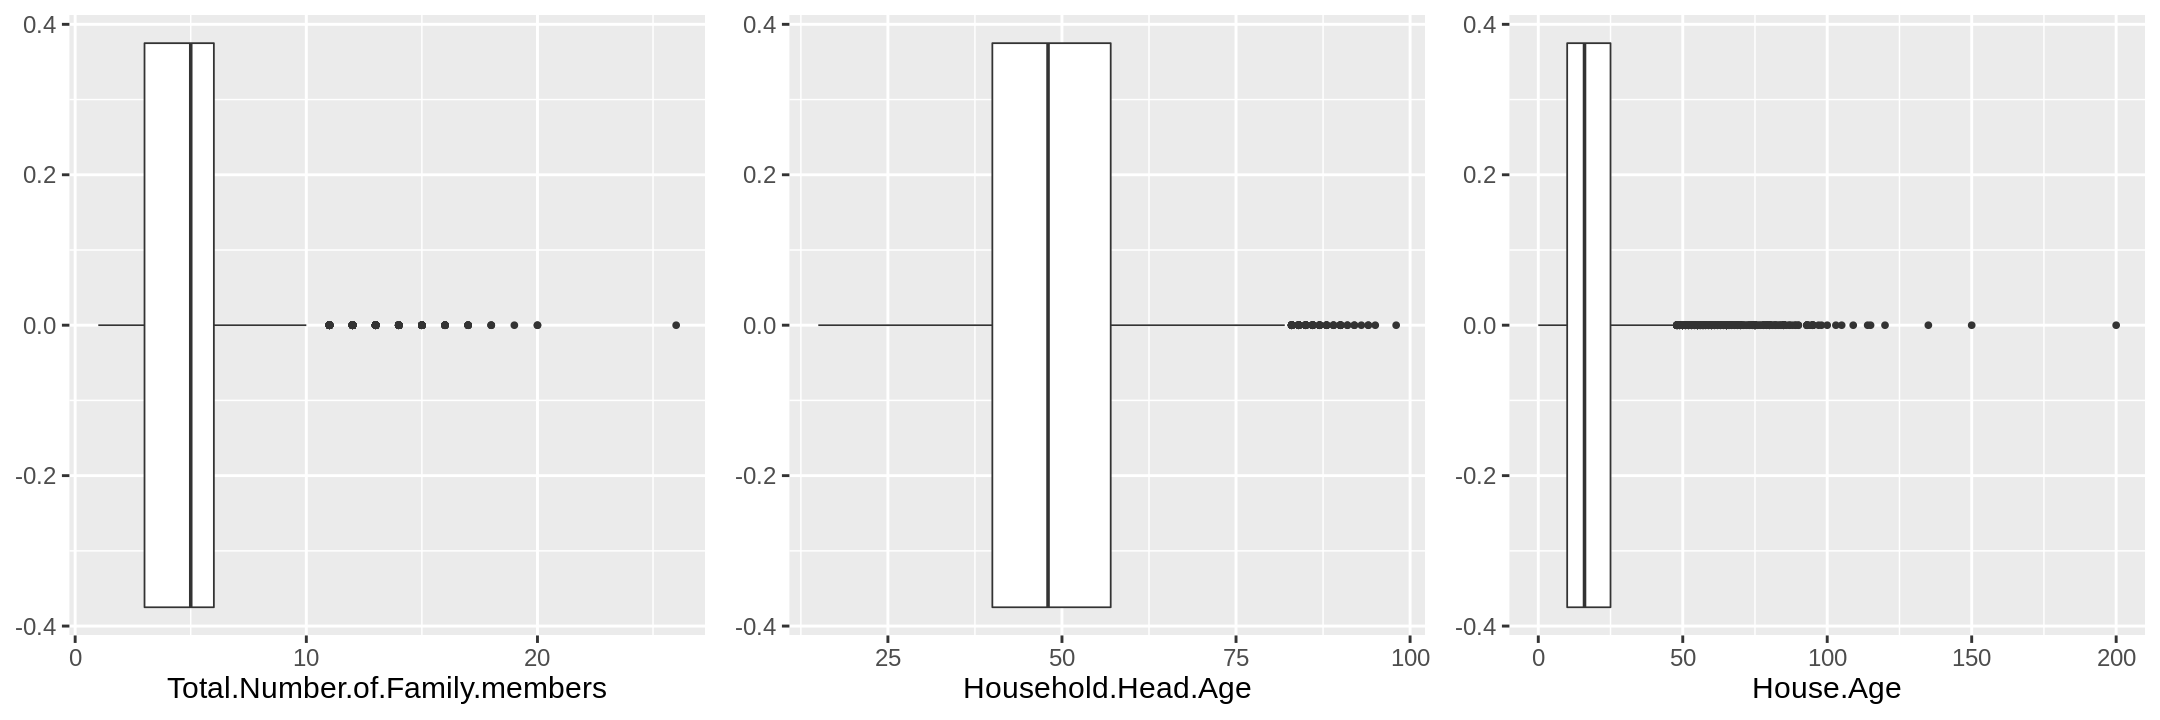

In [14]:
p1 = data %>%
ggplot(aes(x = Total.Number.of.Family.members)) + geom_boxplot() + theme_gray(base_size = 18)
p2 = data %>%
ggplot(aes(x = Household.Head.Age)) + geom_boxplot() + theme_gray(base_size = 18)
p3 = data %>%
ggplot(aes(x = House.Age)) + geom_boxplot() + theme_gray(base_size = 18)

grid.arrange(p1, p2, p3, nrow = 1)



*   Eliminated all observations with family size > 12: additional 138
*   Eliminated all observations with household head age  > 85: additional 44
*   Eliminated all observations with house age  > 50 : additional 1013





In [15]:
dt = dt[dt$Total.Number.of.Family.members <=12, ]
print(dim(dt))

dt = dt[dt$Household.Head.Age <=85, ]
print(dim(dt))

dt = dt[dt$House.Age <=50, ]
print(dim(dt))

[1] 32616    48
[1] 32572    48
[1] 31559    48




*  Eliminate columns: Household business/job indicator (all same), 
*  Household head occupation (too fragmented), 
*  Type of building/house (94% in one category). 
*  Basically, remove those which don’t have much variation in them.  
*  Comment: Also, those columns should be eliminated where >= 95% information is missing. 
*  In banking context, except variables like “litigation” etc. which is a very important variable but populated % typically is very low.  




In [16]:
cols_eliminate = c('Household.Head.Job.or.Business.Indicator','Household.Head.Occupation', 'Type.of.Building.House' )
dt = dt %>%
     select(-all_of(cols_eliminate))
print(dim(dt))

[1] 31559    45


## Factor analysis



*   At this stage we first run factor analysis with all the numeric variables keeping income aside.
* The final dataset has 31559 observations, 2 income columns ( raw and transformed) , 31 numeric variables and 12 categorical variables. 



In [17]:
# you can run structure function to confirm details
# str(dt)
table(sapply(dt, class))


 factor integer numeric 
     12      32       1 

In [18]:
# use the 31 numeric vars for factor analysis
# remove the raw and transformed target
dt_num = dt %>% 
         select(where(is.numeric))%>%
         select(-c(HH.Income, Total.Household.Income))
table(sapply(dt_num, class))


integer 
     31 

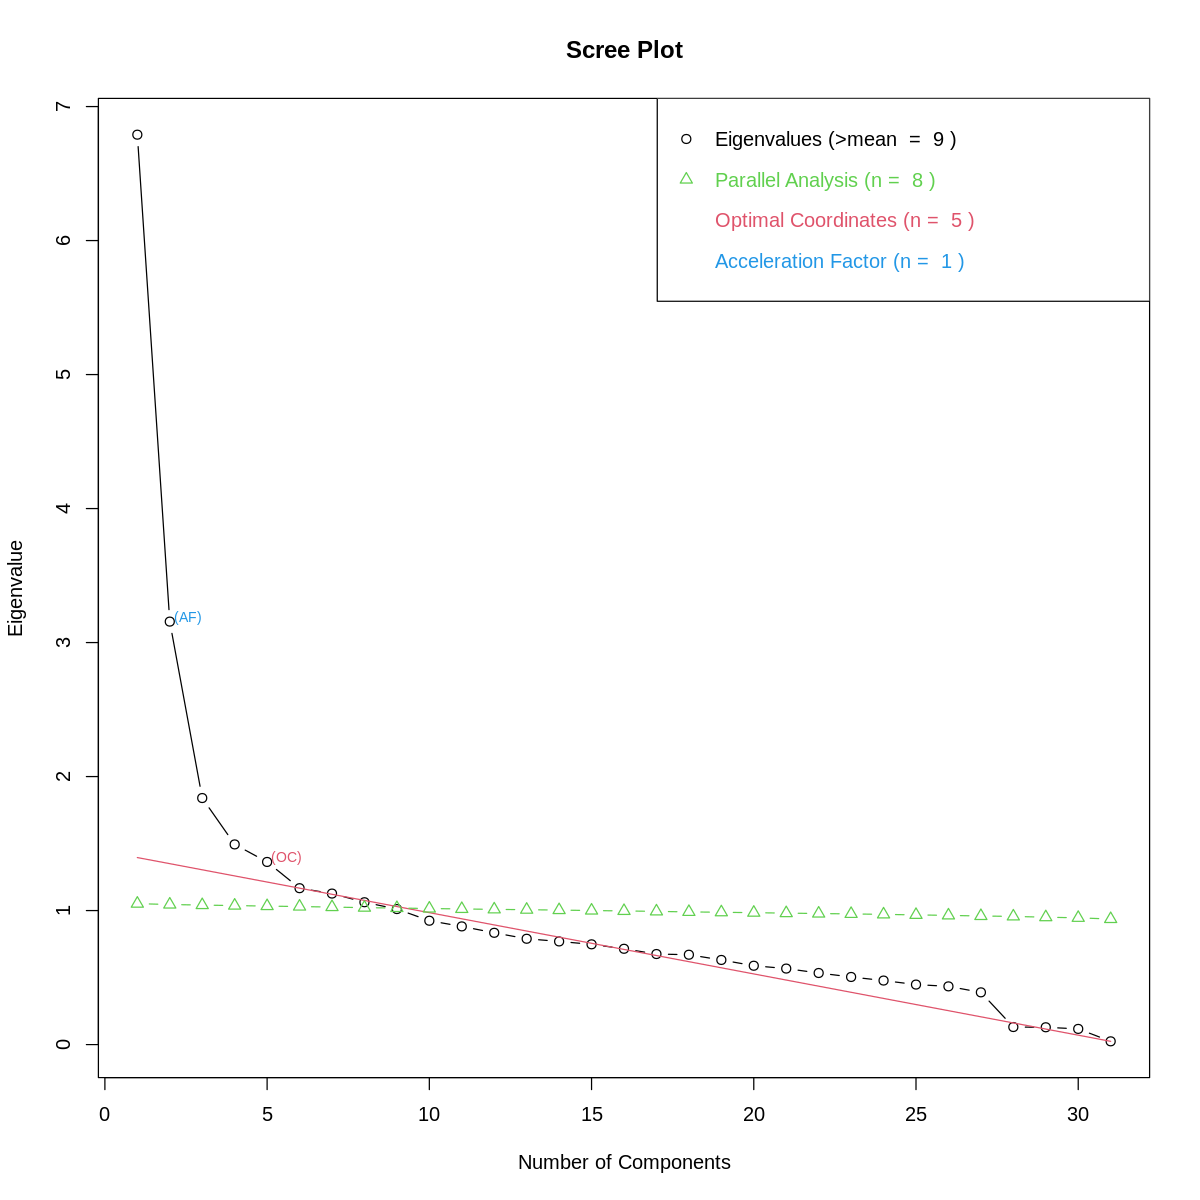

In [19]:
# Determine Number of Factors to Extract
ev <- eigen(cor(dt_num)) # get eigenvalues
ap <- parallel(subject=nrow(dt_num),var=ncol(dt_num),
  rep=100,cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)

options(repr.plot.width=10, repr.plot.height=10)# control the fig sizes
plotnScree(nS, xlab = 'Number of Components', ylab = 'Eigenvalue', main = "Scree Plot")

In [20]:
# fa.none = fa(r=dt_num, nfactors = ncol(dt_num),rotate='none')
fa.none = fa(r=dt_num, nfactors = ncol(dt_num),rotate = 'varimax') # none rotation
n_factors = length(fa.none$e.values)
e_vals = fa.none$e.values
per = fa.none$Vaccounted[4,]
cumm_per = (fa.none$Vaccounted)[5,]

fa_df = data.frame('Number' = 1:length(cumm_per), 
                  'Eigenvalue' = e_vals[1:length(cumm_per)], 
                  'Percent' = per, 
                  'Cum_Percent' = cumm_per)
# row.names(fa_df) <- NULL

fa_df

,Number,Eigenvalue,Percent,Cum_Percent
,<int>,<dbl>,<dbl>,<dbl>
MR1,1,6.79022137,1.631764e-01,0.1631764
MR2,2,3.15652502,1.118145e-01,0.2749909
MR5,3,1.83987992,7.811989e-02,0.3531108
MR9,4,1.49378913,7.078587e-02,0.4238967
MR7,5,1.36295385,5.948476e-02,0.4833815
MR14,6,1.16713870,5.622661e-02,0.5396081
MR6,7,1.12706918,5.087472e-02,0.5904828
MR3,8,1.06234056,4.785257e-02,0.6383354
MR13,9,1.01147806,4.460266e-02,0.6829380


 **Note only 9 factors have eigen value >=1 but it explains only 68% of the variability. So, to achieve about 90% variability, 16 factors have been chosen and rotated (varimax) factor output has been analysed. Based on the factor analysis output factor naming has been done. ** 

In [21]:
df_loadings = data.frame(round(fa.none$loadings[1:n_factors,],3))
df_loadings = df_loadings[, 1:16]

In [44]:
df_loadings %>%
arrange(desc(MR17))# change the values from MR1 to MR2, MR5, ... MR17 sequentially to understand and profile each factor from 1 to 16

,MR1,MR2,MR5,MR9,MR7,MR14,MR6,MR3,MR13,MR12,MR20,MR24,MR11,MR4,MR10,MR17
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Electricity,0.143,0.060,0.091,-0.053,0.063,0.001,-0.022,-0.044,0.105,-0.018,0.044,0.067,0.056,-0.008,-0.120,0.457
Meat.Expenditure,0.444,0.114,0.180,0.011,0.122,0.243,0.012,0.002,0.089,0.143,0.075,0.738,0.178,-0.026,-0.042,0.158
Number.of.bedrooms,0.197,0.085,0.142,-0.012,-0.006,0.059,-0.006,0.101,0.572,0.053,0.015,0.008,0.000,0.101,-0.112,0.144
Housing.and.water.Expenditure,0.456,0.018,0.777,-0.030,0.113,0.121,-0.015,-0.043,0.184,0.044,-0.018,0.096,0.038,0.028,0.103,0.137
Total.Food.Expenditure,0.478,0.381,0.156,0.092,0.480,0.354,0.074,-0.018,0.067,0.299,0.079,0.264,0.169,-0.028,0.014,0.115
House.Age,0.064,-0.018,0.075,-0.047,0.050,0.013,-0.018,-0.013,0.138,0.010,0.005,0.030,0.030,0.158,0.028,0.097
Transportation.Expenditure,0.598,0.065,0.149,-0.003,0.159,0.092,-0.025,0.011,0.088,0.058,0.104,0.082,0.067,-0.003,-0.009,0.087
Miscellaneous.Goods.and.Services.Expenditure,0.652,0.068,0.120,-0.020,0.107,0.116,0.004,-0.051,0.091,0.071,0.083,0.062,0.020,-0.025,0.000,0.077
Restaurant.and.hotels.Expenditure,0.377,0.023,0.113,0.026,0.896,0.021,-0.023,-0.043,0.013,-0.001,0.080,0.049,0.077,-0.024,0.048,0.076


#### **Factor Naming:**
16 latent factors have been named; See the image below for factor names:
<img src="https://drive.google.com/uc?id=1Xx50JwUQYMLj3K312c3qo8YszxqSbIcq" alt="image" >


In [45]:
# df_loadings%>%
# arrange(desc(MR2))

In [46]:
# df_loadings%>%
# arrange(desc(MR3))